In [1]:
import pandas as pd


In [2]:
files = [f"2024-0{x}_HRTravelTimes.csv" for x in range(1,5)]
files

['2024-01_HRTravelTimes.csv',
 '2024-02_HRTravelTimes.csv',
 '2024-03_HRTravelTimes.csv',
 '2024-04_HRTravelTimes.csv']

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))

/Users/ncantalupa/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3308: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = pd.concat(dfs, axis=0)

In [5]:
df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,Revere Beach,2024-01-02T00:13:20Z,87200,2024-01-02T00:13:56Z,87236,36
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,Beachmont,2024-01-02T00:13:20Z,87200,2024-01-02T00:15:57Z,87357,157
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,Suffolk Downs,2024-01-02T00:13:20Z,87200,2024-01-02T00:17:34Z,87454,254
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,Orient Heights,2024-01-02T00:13:20Z,87200,2024-01-02T00:19:19Z,87559,359
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,Wood Island,2024-01-02T00:13:20Z,87200,2024-01-02T00:22:11Z,87731,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763013,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-davis,70064,Davis,2024-05-01T00:09:31Z,86971,2024-05-01T00:13:35Z,87215,244
2763014,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-alfcl,70061,Alewife,2024-05-01T00:09:31Z,86971,2024-05-01T00:17:03Z,87423,452
2763015,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-davis,70064,Davis,2024-05-01T00:11:39Z,87099,2024-05-01T00:13:35Z,87215,116
2763016,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-alfcl,70061,Alewife,2024-05-01T00:11:39Z,87099,2024-05-01T00:17:03Z,87423,324


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 2763017
Data columns (total 16 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   service_date                  object
 1   route_id                      object
 2   trip_id                       object
 3   direction_id                  int64 
 4   direction                     object
 5   from_parent_station           object
 6   from_stop_id                  object
 7   from_stop_name                object
 8   to_parent_station             object
 9   to_stop_id                    object
 10  to_stop_name                  object
 11  from_stop_departure_datetime  object
 12  from_stop_departure_sec       int64 
 13  to_stop_arrival_datetime      object
 14  to_stop_arrival_sec           int64 
 15  travel_time_sec               int64 
dtypes: int64(4), object(12)
memory usage: 1.4+ GB


In [7]:
df['datetime'] = pd.to_datetime(df["from_stop_departure_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [8]:
df["datetime_floor"] = df['datetime'].dt.floor("H")

In [9]:
df["datetime_merge"] = df["datetime_floor"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [10]:
df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec,datetime,datetime_floor,datetime_merge
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,Revere Beach,2024-01-02T00:13:20Z,87200,2024-01-02T00:13:56Z,87236,36,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,Beachmont,2024-01-02T00:13:20Z,87200,2024-01-02T00:15:57Z,87357,157,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,Suffolk Downs,2024-01-02T00:13:20Z,87200,2024-01-02T00:17:34Z,87454,254,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,Orient Heights,2024-01-02T00:13:20Z,87200,2024-01-02T00:19:19Z,87559,359,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,Wood Island,2024-01-02T00:13:20Z,87200,2024-01-02T00:22:11Z,87731,531,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763013,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-davis,70064,Davis,2024-05-01T00:09:31Z,86971,2024-05-01T00:13:35Z,87215,244,2024-05-01 00:09:31,2024-05-01,2024-05-01 00:00:00
2763014,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-alfcl,70061,Alewife,2024-05-01T00:09:31Z,86971,2024-05-01T00:17:03Z,87423,452,2024-05-01 00:09:31,2024-05-01,2024-05-01 00:00:00
2763015,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-davis,70064,Davis,2024-05-01T00:11:39Z,87099,2024-05-01T00:13:35Z,87215,116,2024-05-01 00:11:39,2024-05-01,2024-05-01 00:00:00
2763016,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-alfcl,70061,Alewife,2024-05-01T00:11:39Z,87099,2024-05-01T00:17:03Z,87423,324,2024-05-01 00:11:39,2024-05-01,2024-05-01 00:00:00


In [11]:
weather_df = pd.read_csv("boston_weather_010124-060424.csv")
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Boston,United States",2024-01-01T00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,"Boston,United States",2024-01-01T01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,"Boston,United States",2024-01-01T02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,"Boston,United States",2024-01-01T03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,"Boston,United States",2024-01-01T04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,1015.1,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04T19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,1015.4,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3739,"Boston,United States",2024-06-04T20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,1015.2,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3740,"Boston,United States",2024-06-04T21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,1015.3,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"
3741,"Boston,United States",2024-06-04T22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,1015.9,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"


In [12]:
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Boston,United States",2024-01-01 00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,"Boston,United States",2024-01-01 01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,"Boston,United States",2024-01-01 02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,"Boston,United States",2024-01-01 03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,"Boston,United States",2024-01-01 04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,1015.1,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04 19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,1015.4,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3739,"Boston,United States",2024-06-04 20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,1015.2,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3740,"Boston,United States",2024-06-04 21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,1015.3,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"
3741,"Boston,United States",2024-06-04 22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,1015.9,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"


In [13]:
weather_df["datetime_merge"] = weather_df["datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,datetime_merge
0,"Boston,United States",2024-01-01 00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 00:00:00
1,"Boston,United States",2024-01-01 01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 01:00:00
2,"Boston,United States",2024-01-01 02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 02:00:00
3,"Boston,United States",2024-01-01 03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 03:00:00
4,"Boston,United States",2024-01-01 04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04 19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS",2024-06-04 19:00:00
3739,"Boston,United States",2024-06-04 20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS",2024-06-04 20:00:00
3740,"Boston,United States",2024-06-04 21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS",2024-06-04 21:00:00
3741,"Boston,United States",2024-06-04 22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS",2024-06-04 22:00:00


In [14]:
merged_df = pd.merge(df, weather_df, "inner", on="datetime_merge")
merged_df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117835,2024-04-30,Red,61319309,1,North,place-harsq,70068,Harvard,place-davis,70064,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117836,2024-04-30,Red,61319309,1,North,place-harsq,70068,Harvard,place-alfcl,70061,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117837,2024-04-30,Red,61319309,1,North,place-portr,70066,Porter,place-davis,70064,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117838,2024-04-30,Red,61319309,1,North,place-portr,70066,Porter,place-alfcl,70061,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 11117839
Data columns (total 43 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   service_date                  object        
 1   route_id                      object        
 2   trip_id                       object        
 3   direction_id                  int64         
 4   direction                     object        
 5   from_parent_station           object        
 6   from_stop_id                  object        
 7   from_stop_name                object        
 8   to_parent_station             object        
 9   to_stop_id                    object        
 10  to_stop_name                  object        
 11  from_stop_departure_datetime  object        
 12  from_stop_departure_sec       int64         
 13  to_stop_arrival_datetime      object        
 14  to_stop_arrival_sec           int64         
 15  travel_time_sec               

In [16]:
events = pd.read_csv("combined_events.csv")
events

,rand_event_id,venue,event,date,time,datetime,lat,long
0,TD_846KU59U,TD Garden,Boston Celtics vs. Miami Heat,Fri Oct 27 2023,19:30,2023-10-27T19:30:00,42.365841,-71.060724
1,TD_53HL6410,TD Garden,Boston Celtics vs. Indiana Pacers,Wed Nov 1 2023,19:30,2023-11-01T19:30:00,42.365841,-71.060724
2,TD_OUP7684S,TD Garden,Boston Celtics vs. Brooklyn Nets,Fri Nov 10 2023,19:30,2023-11-10T19:30:00,42.365841,-71.060724
3,TD_YOEOVF6T,TD Garden,Boston Celtics vs. Toronto Raptors,Sat Nov 11 2023,19:00,2023-11-11T19:00:00,42.365841,-71.060724
4,TD_107B0HQF,TD Garden,Boston Celtics vs. New York Knicks,Mon Nov 13 2023,19:30,2023-11-13T19:30:00,42.365841,-71.060724
...,...,...,...,...,...,...,...,...
128,TD_305F493P,TD Garden,Olivia Rodrigo,4/2/24,20:30,2024-04-02T20:30:00,42.365841,-71.060724
129,TD_N83C8994,TD Garden,AJR,4/4/24,19:00,2024-04-04T19:00:00,42.365841,-71.060724
130,TD_Q4FOGA2G,TD Garden,Nicki Minaj,4/8/24,20:30,2024-04-08T20:30:00,42.365841,-71.060724
131,TD_TOO41AA7,TD Garden,Nicki Minaj,4/10/24,20:30,2024-04-10T20:30:00,42.365841,-71.060724


In [17]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rand_event_id  133 non-null    object 
 1   venue          133 non-null    object 
 2   event          133 non-null    object 
 3   date           133 non-null    object 
 4   time           133 non-null    object 
 5   datetime       133 non-null    object 
 6   lat            133 non-null    float64
 7   long           133 non-null    float64
dtypes: float64(2), object(6)
memory usage: 8.4+ KB


In [18]:
venue_dfs = events.groupby("venue", axis=0)
len(venue_dfs)

2

In [19]:
event_datetimes = {}
for name,grouped_df in venue_dfs:
    event_datetimes[name] = list(grouped_df["datetime"])
    event_datetimes[name] = [pd.to_datetime(x) for x in event_datetimes[name]]
event_datetimes

{'Fenway Park': [Timestamp('2024-04-09 14:10:00'),
  Timestamp('2024-04-10 19:10:00'),
  Timestamp('2024-04-11 19:10:00'),
  Timestamp('2024-04-12 19:10:00'),
  Timestamp('2024-04-13 16:10:00'),
  Timestamp('2024-04-14 13:45:00'),
  Timestamp('2024-04-15 11:10:00'),
  Timestamp('2024-04-16 19:10:00'),
  Timestamp('2024-04-17 19:10:00'),
  Timestamp('2024-04-18 13:45:00'),
  Timestamp('2024-04-26 19:10:00'),
  Timestamp('2024-04-27 16:10:00'),
  Timestamp('2024-04-28 19:10:00'),
  Timestamp('2024-04-30 19:10:00')],
 'TD Garden': [Timestamp('2023-10-27 19:30:00'),
  Timestamp('2023-11-01 19:30:00'),
  Timestamp('2023-11-10 19:30:00'),
  Timestamp('2023-11-11 19:00:00'),
  Timestamp('2023-11-13 19:30:00'),
  Timestamp('2023-11-22 19:30:00'),
  Timestamp('2023-11-26 18:00:00'),
  Timestamp('2023-11-28 19:30:00'),
  Timestamp('2023-12-01 19:30:00'),
  Timestamp('2023-12-08 19:30:00'),
  Timestamp('2023-12-12 19:30:00'),
  Timestamp('2023-12-14 19:30:00'),
  Timestamp('2023-12-15 19:30:00'),

In [20]:
from datetime import datetime, timedelta

In [24]:
fenway_event_times = []
garden_event_times = []
for time in event_datetimes["Fenway Park"]:
    date_range = list(pd.date_range(str(time - timedelta(hours=2)), str(time + timedelta(hours=2)), freq="5min"))
    fenway_event_times.extend(date_range)
fenway_event_times.extend(event_datetimes["Fenway Park"])
fenway_event_times

[Timestamp('2024-04-09 12:10:00', freq='5T'),
 Timestamp('2024-04-09 12:15:00', freq='5T'),
 Timestamp('2024-04-09 12:20:00', freq='5T'),
 Timestamp('2024-04-09 12:25:00', freq='5T'),
 Timestamp('2024-04-09 12:30:00', freq='5T'),
 Timestamp('2024-04-09 12:35:00', freq='5T'),
 Timestamp('2024-04-09 12:40:00', freq='5T'),
 Timestamp('2024-04-09 12:45:00', freq='5T'),
 Timestamp('2024-04-09 12:50:00', freq='5T'),
 Timestamp('2024-04-09 12:55:00', freq='5T'),
 Timestamp('2024-04-09 13:00:00', freq='5T'),
 Timestamp('2024-04-09 13:05:00', freq='5T'),
 Timestamp('2024-04-09 13:10:00', freq='5T'),
 Timestamp('2024-04-09 13:15:00', freq='5T'),
 Timestamp('2024-04-09 13:20:00', freq='5T'),
 Timestamp('2024-04-09 13:25:00', freq='5T'),
 Timestamp('2024-04-09 13:30:00', freq='5T'),
 Timestamp('2024-04-09 13:35:00', freq='5T'),
 Timestamp('2024-04-09 13:40:00', freq='5T'),
 Timestamp('2024-04-09 13:45:00', freq='5T'),
 Timestamp('2024-04-09 13:50:00', freq='5T'),
 Timestamp('2024-04-09 13:55:00', 

In [25]:
for time in event_datetimes["TD Garden"]:
    date_range = list(pd.date_range(str(time - timedelta(hours=2)), str(time + timedelta(hours=2)), freq="5min"))
    garden_event_times.extend(date_range)
garden_event_times.extend(event_datetimes["TD Garden"])

In [26]:
len(garden_event_times)

5950

In [27]:
id_idx = list(merged_df.columns).index("datetime_merge")

In [43]:
fenway_event = []
garden_event = []
for i in range(merged_df.shape[0]):
    print(f"{round(i/merged_df.shape[0], 4)*100}%                                 ", end="\r")
    vehichle_datetime = pd.to_datetime(merged_df.iloc[i, id_idx])
    # print(vehichle_datetime in event_datetimes["Fenway Park"])
    fenway_event.append(vehichle_datetime in fenway_event_times)
    garden_event.append(vehichle_datetime in garden_event_times)
    if i == 100000:
        break

In [60]:
fenway_event_times.append(pd.to_datetime('2024-01-02 00:00:00'))

In [64]:
fenway_event_times = fenway_event_times[:-2]

In [65]:
fenway_event = [pd.to_datetime(merged_df.iloc[i, id_idx]) in fenway_event_times for i in range(merged_df.shape[0])]

In [71]:
garden_event = [pd.to_datetime(merged_df.iloc[i, id_idx]) in garden_event_times for i in range(merged_df.shape[0])]

In [72]:
garden_event.index(True)

354644

In [73]:
len(garden_event)

11117840

In [76]:
merged_df["fenway_event"] = fenway_event
merged_df["garden_event"] = garden_event

In [77]:
merged_df.head()

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,fenway_event,garden_event
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False


In [79]:
merged_df.columns

Index(['service_date', 'route_id', 'trip_id', 'direction_id', 'direction',
       'from_parent_station', 'from_stop_id', 'from_stop_name',
       'to_parent_station', 'to_stop_id', 'to_stop_name',
       'from_stop_departure_datetime', 'from_stop_departure_sec',
       'to_stop_arrival_datetime', 'to_stop_arrival_sec', 'travel_time_sec',
       'datetime_x', 'datetime_floor', 'datetime_merge', 'name', 'datetime_y',
       'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon',
       'stations', 'fenway_event', 'garden_event'],
      dtype='object')

In [98]:
trimmed_df = merged_df[['route_id','from_stop_id','to_stop_id',
       'from_stop_departure_datetime',
       'to_stop_arrival_datetime', 'travel_time_sec',
       'datetime_x',
       'temp', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth','windspeed', 
       'icon','fenway_event', 'garden_event']]

In [99]:
trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 11117839
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   route_id                      object        
 1   from_stop_id                  object        
 2   to_stop_id                    object        
 3   from_stop_departure_datetime  object        
 4   to_stop_arrival_datetime      object        
 5   travel_time_sec               int64         
 6   datetime_x                    datetime64[ns]
 7   temp                          float64       
 8   precip                        float64       
 9   precipprob                    int64         
 10  preciptype                    object        
 11  snow                          float64       
 12  snowdepth                     int64         
 13  windspeed                     float64       
 14  icon                          object        
 15  fenway_event                  

In [100]:
trimmed_df.to_csv("travel_times_wWthrEvnts.csv", index=False)

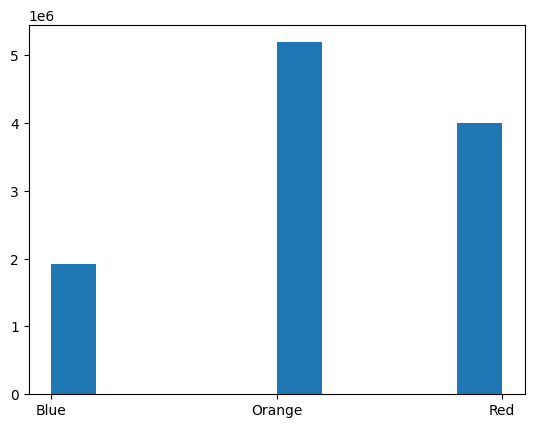

In [109]:
import matplotlib.pyplot as plt

plt.hist(trimmed_df["route_id"])
plt.show()

In [101]:
grouped_by_to_from_stops = trimmed_df.groupby(["from_stop_id", "to_stop_id"])

In [102]:
for name, grouped_df in grouped_by_to_from_stops:
    print(name, grouped_by_to_from_stops.head())
    break

('70001', 70003)          route_id from_stop_id to_stop_id from_stop_departure_datetime  \
0            Blue        70059      70057         2024-01-02T00:13:20Z   
1            Blue        70059      70055         2024-01-02T00:13:20Z   
2            Blue        70059      70053         2024-01-02T00:13:20Z   
3            Blue        70059      70051         2024-01-02T00:13:20Z   
4            Blue        70059      70049         2024-01-02T00:13:20Z   
...           ...          ...        ...                          ...   
10952367      Red        70095      70095         2024-04-29T10:18:08Z   
11031756   Orange        70035      70003         2024-04-30T07:36:45Z   
11031757   Orange        70035      70005         2024-04-30T07:36:45Z   
11031758   Orange        70035      70007         2024-04-30T07:36:45Z   
11031759   Orange        70035      70009         2024-04-30T07:36:45Z   

         to_stop_arrival_datetime  travel_time_sec          datetime_x  temp  \
0            2

In [103]:
grouped_df

,route_id,from_stop_id,to_stop_id,from_stop_departure_datetime,to_stop_arrival_datetime,travel_time_sec,datetime_x,temp,precip,precipprob,preciptype,snow,snowdepth,windspeed,icon,fenway_event,garden_event
1250,Orange,70001,70003,2024-01-02T00:00:21Z,2024-01-02T00:01:41Z,80,2024-01-02 00:00:21,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1440,Orange,70001,70003,2024-01-02T00:15:28Z,2024-01-02T00:16:45Z,77,2024-01-02 00:15:28,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1630,Orange,70001,70003,2024-01-02T00:30:44Z,2024-01-02T00:32:05Z,81,2024-01-02 00:30:44,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
4791,Orange,70001,70003,2024-01-01T07:53:26Z,2024-01-01T07:54:48Z,82,2024-01-01 07:53:26,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
4978,Orange,70001,70003,2024-01-01T07:01:18Z,2024-01-01T07:02:40Z,82,2024-01-01 07:01:18,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112542,Orange,70001,70003,2024-04-30T23:56:23Z,2024-04-30T23:57:39Z,76,2024-04-30 23:56:23,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11112579,Orange,70001,70003,2024-04-30T23:01:02Z,2024-04-30T23:02:23Z,81,2024-04-30 23:01:02,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11115717,Orange,70001,70003,2024-05-01T00:06:29Z,2024-05-01T00:07:51Z,82,2024-05-01 00:06:29,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False
11115907,Orange,70001,70003,2024-05-01T00:18:25Z,2024-05-01T00:19:46Z,81,2024-05-01 00:18:25,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False


/Users/ncantalupa/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:xlabel='garden_event', ylabel='travel_time_sec'>

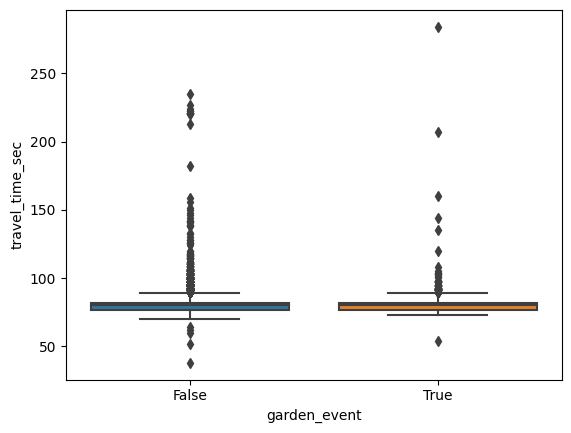

In [117]:
import seaborn as sns

sns.boxplot(x="garden_event", y="travel_time_sec", data=grouped_df)

In [116]:
grouped_df.columns

Index(['route_id', 'from_stop_id', 'to_stop_id',
       'from_stop_departure_datetime', 'to_stop_arrival_datetime',
       'travel_time_sec', 'datetime_x', 'temp', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'icon', 'fenway_event',
       'garden_event'],
      dtype='object')

,datetime_x,temp,precip,precipprob,snow,snowdepth,windspeed,fenway_event,garden_event
1250,2024-01-02 00:00:21,28.0,0.0,0,0.0,0,9.1,False,False
1440,2024-01-02 00:15:28,28.0,0.0,0,0.0,0,9.1,False,False
1630,2024-01-02 00:30:44,28.0,0.0,0,0.0,0,9.1,False,False
4791,2024-01-01 07:53:26,32.0,0.0,0,0.0,0,5.7,False,False
4978,2024-01-01 07:01:18,32.0,0.0,0,0.0,0,5.7,False,False
...,...,...,...,...,...,...,...,...,...
11112542,2024-04-30 23:56:23,48.0,0.0,0,0.0,0,15.9,False,False
11112579,2024-04-30 23:01:02,48.0,0.0,0,0.0,0,15.9,False,False
11115717,2024-05-01 00:06:29,48.0,0.0,0,0.0,0,10.2,False,False
11115907,2024-05-01 00:18:25,48.0,0.0,0,0.0,0,10.2,False,False


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
features = ['month', 'dayofweek', 'hour', 'temp', 'precip', 'precipprob', 'snow', 'snowdepth', 'windspeed', 'fenway_event',
       'garden_event']

In [150]:
model_summary = pd.DataFrame(columns=["route",'routes_trained_on', "intercept",'month', 'dayofweek', 'hour', 'temp', 'precip', 'precipprob', 'snow', 'snowdepth', 'windspeed', 'fenway_event',
       'garden_event', "r_squared", "mse"])

In [151]:
counter = 1
for route, grouped_df in grouped_by_to_from_stops:
    print(f"Route {counter}/{len(grouped_by_to_from_stops)}      ", end = "\r")
    if grouped_df.shape[0] >= 10:
        grouped_df["fenway_event"] = grouped_df["fenway_event"].astype(int)
        grouped_df["garden_event"] = grouped_df["garden_event"].astype(int)
        grouped_df['month'] = grouped_df['datetime_x'].dt.month
        grouped_df['dayofweek'] = grouped_df['datetime_x'].dt.dayofweek
        grouped_df['hour'] = grouped_df['datetime_x'].dt.hour

        X = grouped_df[features]
        y = grouped_df['travel_time_sec']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        model_summary = model_summary.append({
            'route': route,
            'routes_trained_on': grouped_df.shape[0], 
            'intercept': model.intercept_,
            'month': model.coef_[0],
            'dayofweek': model.coef_[1],
            'hour': model.coef_[2],
            'temp': model.coef_[3],
            'precip': model.coef_[4],
            'precipprob': model.coef_[5],
            'snow': model.coef_[6],
            'snowdepth': model.coef_[7],
            'windspeed': model.coef_[8],
            'fenway_event': model.coef_[9],
            'garden_event': model.coef_[10],
            'r_squared': r2,
            'mse': mse
        }, ignore_index=True)
    counter += 1



In [152]:
model_summary

,route,routes_trained_on,intercept,month,dayofweek,hour,temp,precip,precipprob,snow,snowdepth,windspeed,fenway_event,garden_event,r_squared,mse
0,"(70001, 70003)",9994,84.490995,-0.377345,0.173567,-0.093848,-0.069435,2.334053,0.001518,1.598835e+00,-1.110223e-15,0.065895,0.964495,0.188400,0.019188,60.684443
1,"(70001, 70005)",9980,221.991706,-1.078030,-0.292959,-0.238960,-0.124498,-8.489145,-0.006531,1.210271e+00,8.881784e-16,0.247303,0.137503,-0.951424,0.019101,297.057266
2,"(70001, 70007)",9974,399.341942,-0.393474,-1.912170,-0.723353,-0.186263,-6.336538,-0.033307,2.709773e+00,6.661338e-16,0.768141,-4.821300,1.007680,-0.006938,2583.684948
3,"(70001, 70009)",9641,508.487625,-3.144976,-0.427206,-0.847914,0.023569,-41.161386,0.056209,5.155167e+00,1.776357e-14,0.224608,2.235712,-1.745981,0.006191,4798.389496
4,"(70001, 70011)",9639,606.536167,-1.024447,-0.766237,-1.027490,0.011066,-59.289798,0.090463,7.248004e+00,9.769963e-14,0.218305,0.663331,-2.046561,0.011890,2996.921096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,"(Oak Grove-02, 70028)",136,829.116298,9.221663,-0.690127,0.052549,-0.091435,-219.063599,0.359101,9.201528e-13,0.000000e+00,-0.053489,0.000000,24.247396,0.012016,19056.049570
2217,"(Oak Grove-02, 70030)",136,602.761304,6.872464,-1.144030,-0.101702,-0.025584,-157.277373,0.180327,6.608047e-13,0.000000e+00,-0.570325,0.000000,18.022155,0.001816,11054.451754
2218,"(Oak Grove-02, 70032)",141,390.512107,5.562770,-3.717400,0.104153,-0.515278,-56.736897,0.184728,-1.350031e-13,0.000000e+00,-1.736236,0.000000,17.759052,-0.086537,9846.372579
2219,"(Oak Grove-02, 70034)",143,130.335558,4.785993,0.423477,0.371196,-0.199606,-63.215732,0.352440,2.842171e-14,0.000000e+00,-1.802976,0.000000,17.790994,-133.790439,386.580902


In [161]:
stops = pd.read_csv("stops.csv", index_col=0)
stops.loc["70005"]

address                                                  NaN
at_street                                                NaN
description            Stony Brook - Orange Line - Oak Grove
latitude                                           42.317062
location_type                                              0
longitude                                         -71.104248
municipality                                          Boston
name                                             Stony Brook
on_street                                                NaN
platform_code                                            NaN
platform_name                                      Oak Grove
vehicle_type                                             1.0
wheelchair_boarding                                        1
Name: 70005, dtype: object

In [180]:
model_summary[model_summary["route"] == ('70026', 70024)]

,route,routes_trained_on,intercept,month,dayofweek,hour,temp,precip,precipprob,snow,snowdepth,windspeed,fenway_event,garden_event,r_squared,mse
506,"(70026, 70024)",13519,67.704696,-3.406755,0.291399,-0.096567,-0.133036,3.528504,-0.064681,-0.691203,7.549517e-15,0.273724,-1.188344,2.619865,0.005807,6625.415138


In [165]:
stops[stops["name"] == "North Station"]

,address,at_street,description,latitude,location_type,longitude,municipality,name,on_street,platform_code,platform_name,vehicle_type,wheelchair_boarding
70026,NaN,NaN,North Station - Orange Line - Forest Hills,42.365280,0,-71.060205,Boston,North Station,NaN,NaN,Forest Hills,1.0,1
70027,NaN,NaN,North Station - Orange Line - Oak Grove,42.365280,0,-71.060205,Boston,North Station,NaN,NaN,Oak Grove,1.0,1
70205,NaN,NaN,North Station - Green Line - Lechmere & North,42.365280,0,-71.060205,Boston,North Station,NaN,NaN,Lechmere & North,0.0,1
70206,NaN,NaN,North Station - Green Line - Copley & West,42.365280,0,-71.060205,Boston,North Station,NaN,NaN,Copley & West,0.0,1
9070026,NaN,Causeway Street,North Station - Orange Line Shuttle - Haverhil...,42.365608,0,-71.060426,Boston,North Station,Haverhill Street,NaN,Orange Line Shuttle,3.0,1
9070027,NaN,NaN,North Station - Orange Line Shuttle - N Washin...,42.365460,0,-71.058239,Boston,North Station,NaN,NaN,Sullivan Shuttle,3.0,1
BNT-0000,NaN,NaN,North Station - Commuter Rail,42.366417,0,-71.062326,Boston,North Station,NaN,NaN,Commuter Rail,2.0,1
BNT-0000-01,NaN,NaN,North Station - Commuter Rail - Track 1,42.366493,0,-71.062829,Boston,North Station,NaN,1,Commuter Rail - Track 1,2.0,1
BNT-0000-02,NaN,NaN,North Station - Commuter Rail - Track 2,42.366493,0,-71.062829,Boston,North Station,NaN,2,Commuter Rail - Track 2,2.0,1
BNT-0000-03,NaN,NaN,North Station - Commuter Rail - Track 3,42.366535,0,-71.062730,Boston,North Station,NaN,3,Commuter Rail - Track 3,2.0,1


In [185]:
new_route = []
for i, row in model_summary.iterrows():
    route_tuple = row['route']
    new_route.append((str(route_tuple[0]), str(route_tuple[1])))
model_summary['route'] = new_route

In [187]:
model_summary.to_csv("lr_model_results.csv", index=False)

In [193]:
# counter = 1
# for route, grouped_df in grouped_by_to_from_stops:
#     print(f"Route {counter}/{len(grouped_by_to_from_stops)}      ", end = "\r")
    
#     counter += 1
#     break

-1.540424756175371


In [202]:
highest_r_squared = pd.DataFrame(model_summary.sort_values(by="r_squared", ascending=False).head(30))
highest_r_squared

,route,routes_trained_on,intercept,month,dayofweek,hour,temp,precip,precipprob,snow,snowdepth,windspeed,fenway_event,garden_event,r_squared,mse
1992,"(Alewife-02, 70089)",39,2306.088927,-90.933899,108.829567,-35.984007,10.908042,-1.153070e+03,3.531463e+00,3.089218e+02,2.046363e-12,46.264094,254.106162,1257.475719,0.880240,16388.793486
1991,"(Alewife-02, 70087)",39,2032.321754,-83.773738,113.306570,-35.863883,11.849826,-2.006431e+03,4.114479e+00,2.833483e+02,3.183231e-12,46.942770,230.593697,1263.465721,0.876198,16564.162123
1993,"(Alewife-02, 70091)",39,2393.116667,-97.181827,110.747042,-35.863895,12.102447,-2.507997e+03,4.172947e+00,3.321934e+02,3.979039e-12,46.999894,233.188222,1265.637472,0.873750,17491.596364
1994,"(Alewife-02, 70093)",39,2506.678402,-79.578640,115.041340,-36.803871,11.944786,-2.360380e+03,4.280117e+00,3.724383e+02,3.865352e-12,48.199002,231.786278,1273.314329,0.855895,20661.020464
1990,"(Alewife-02, 70085)",39,1719.310928,-106.263282,107.589188,-35.963831,17.089189,-4.104370e+03,5.043031e+00,2.725426e+02,6.366463e-12,52.560913,74.639802,1242.203942,0.809146,25043.349123
1675,"(70095, 70097)",439,304.116429,141.442738,-2.683762,-1.268151,-2.114904,1.299613e+02,-2.523132e-01,2.041621e+01,-4.316547e-13,2.507737,19.903369,13.625423,0.796831,4010.129869
607,"(70031, 70279)",1170,138.618065,-15.628079,-1.670468,0.173718,-0.522937,-1.561096e+01,-8.639671e-02,-4.471654e+00,0.000000e+00,-0.323921,5.821247,4.203016,0.780786,93.966557
603,"(70031, 70279)",13522,115.281338,-17.171458,-0.065479,-0.070027,0.036806,-1.893064e+01,-9.398591e-03,6.253154e-01,-1.776357e-15,-0.145019,3.995791,0.342748,0.767322,111.592774
1483,"(70083, 70097)",434,512.129482,150.961400,-4.157307,-0.866522,-2.796730,8.489073e+02,-4.887642e-01,4.724243e+00,3.623768e-13,2.167884,12.456143,17.452152,0.766963,6514.693503
990,"(70061, 70063)",831,423.198698,-88.502352,-10.366706,0.639923,0.758802,-8.312142e+01,-9.746321e-02,-3.390425e+00,2.096101e-13,-2.103982,2.629467,-13.740458,0.748564,3110.450248


In [208]:
from_stop = []
to_stop = []
for i, row in highest_r_squared.iterrows():
    from_stop.append(stops.loc[row["route"][0]]["description"])
    to_stop.append(stops.loc[row["route"][1]]["description"])
highest_r_squared["from_stop"] = from_stop
highest_r_squared["to_stop"] = to_stop
highest_r_squared

,route,routes_trained_on,intercept,month,dayofweek,hour,temp,precip,precipprob,snow,snowdepth,windspeed,fenway_event,garden_event,r_squared,mse,from_stop,to_stop
1992,"(Alewife-02, 70089)",39,2306.088927,-90.933899,108.829567,-35.984007,10.908042,-1.153070e+03,3.531463e+00,3.089218e+02,2.046363e-12,46.264094,254.106162,1257.475719,0.880240,16388.793486,Alewife - Red Line - Track 2,Fields Corner - Red Line - Ashmont
1991,"(Alewife-02, 70087)",39,2032.321754,-83.773738,113.306570,-35.863883,11.849826,-2.006431e+03,4.114479e+00,2.833483e+02,3.183231e-12,46.942770,230.593697,1263.465721,0.876198,16564.162123,Alewife - Red Line - Track 2,Savin Hill - Red Line - Ashmont
1993,"(Alewife-02, 70091)",39,2393.116667,-97.181827,110.747042,-35.863895,12.102447,-2.507997e+03,4.172947e+00,3.321934e+02,3.979039e-12,46.999894,233.188222,1265.637472,0.873750,17491.596364,Alewife - Red Line - Track 2,Shawmut - Red Line - Ashmont
1994,"(Alewife-02, 70093)",39,2506.678402,-79.578640,115.041340,-36.803871,11.944786,-2.360380e+03,4.280117e+00,3.724383e+02,3.865352e-12,48.199002,231.786278,1273.314329,0.855895,20661.020464,Alewife - Red Line - Track 2,Ashmont - Red Line - Exit Only
1990,"(Alewife-02, 70085)",39,1719.310928,-106.263282,107.589188,-35.963831,17.089189,-4.104370e+03,5.043031e+00,2.725426e+02,6.366463e-12,52.560913,74.639802,1242.203942,0.809146,25043.349123,Alewife - Red Line - Track 2,JFK/UMass - Red Line - Ashmont
1675,"(70095, 70097)",439,304.116429,141.442738,-2.683762,-1.268151,-2.114904,1.299613e+02,-2.523132e-01,2.041621e+01,-4.316547e-13,2.507737,19.903369,13.625423,0.796831,4010.129869,JFK/UMass - Red Line - Braintree,North Quincy - Red Line - Braintree
607,"(70031, 70279)",1170,138.618065,-15.628079,-1.670468,0.173718,-0.522937,-1.561096e+01,-8.639671e-02,-4.471654e+00,0.000000e+00,-0.323921,5.821247,4.203016,0.780786,93.966557,Sullivan Square - Orange Line - Oak Grove,Assembly - Orange Line - Oak Grove
603,"(70031, 70279)",13522,115.281338,-17.171458,-0.065479,-0.070027,0.036806,-1.893064e+01,-9.398591e-03,6.253154e-01,-1.776357e-15,-0.145019,3.995791,0.342748,0.767322,111.592774,Sullivan Square - Orange Line - Oak Grove,Assembly - Orange Line - Oak Grove
1483,"(70083, 70097)",434,512.129482,150.961400,-4.157307,-0.866522,-2.796730,8.489073e+02,-4.887642e-01,4.724243e+00,3.623768e-13,2.167884,12.456143,17.452152,0.766963,6514.693503,Andrew - Red Line - Ashmont/Braintree,North Quincy - Red Line - Braintree
990,"(70061, 70063)",831,423.198698,-88.502352,-10.366706,0.639923,0.758802,-8.312142e+01,-9.746321e-02,-3.390425e+00,2.096101e-13,-2.103982,2.629467,-13.740458,0.748564,3110.450248,Alewife - Red Line,Davis - Red Line - Ashmont/Braintree
